In [19]:
import pandas as pd
from nba_api.stats.endpoints import PlayerCareerStats

# Nikola Jokić
career = PlayerCareerStats(player_id='203999') 

# Get career statistics as a dictionary
career_dict = career.get_dict()

# Extract the data and headers from the response dictionary
data = career_dict['resultSets'][0]['rowSet']
headers = career_dict['resultSets'][0]['headers']

# Create a DataFrame using the data and headers
career_data = pd.DataFrame(data, columns=headers)

# Now, career_data contains the career statistics as a DataFrame


# I compared the DataFrame you provided with the JSON data, and I found that there is a discrepancy in the data related to the "FG3A" and "FG3_PCT" columns for the season "2015-16". Here's the specific discrepancy:

# DataFrame (career_data):

# "FG3A" for the season "2015-16" is 600.
# "FG3_PCT" for the season "2015-16" is 0.333.
# JSON Data (corresponding row in "SeasonTotalsRegularSeason" under "resultSets"):

# "FG3A" for the season "2015-16" is 84.
# "FG3_PCT" for the season "2015-16" is 0.333.
# It appears that there is a discrepancy in the "FG3A" value for the season "2015-16" between the DataFrame and the JSON data. The DataFrame shows a value of 600, while the JSON data shows a value of 84. Please double-check the data source to ensure accuracy and consistency.

# Other than this specific discrepancy, the rest of the data appears to match between the DataFrame and the JSON data for the provided player's career statistics.

1y

In [20]:
career_data


,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,203999,2015-16,00,1610612743,DEN,21.0,80,55,1733.0,307,...,0.811,181,379,560,189,79,50,104,208,796
1,203999,2016-17,00,1610612743,DEN,22.0,73,59,2038.0,494,...,0.825,212,506,718,359,61,55,171,214,1221
2,203999,2017-18,00,1610612743,DEN,23.0,75,73,2443.0,504,...,0.850,195,608,803,458,90,61,210,212,1385
3,203999,2018-19,00,1610612743,DEN,24.0,80,80,2504.0,616,...,0.821,228,637,865,580,108,55,248,228,1604
4,203999,2019-20,00,1610612743,DEN,25.0,73,73,2335.0,565,...,0.817,166,545,711,512,85,44,226,222,1456
5,203999,2020-21,00,1610612743,DEN,26.0,72,72,2488.0,732,...,0.868,205,575,780,599,95,48,222,192,1898
6,203999,2021-22,00,1610612743,DEN,27.0,74,74,2476.0,764,...,0.810,206,813,1019,584,109,63,281,191,2004
7,203999,2022-23,00,1610612743,DEN,28.0,69,69,2323.0,646,...,0.822,167,650,817,678,87,47,247,174,1690


In [10]:
career_json

'{"resource": "playercareerstats", "parameters": {"PerMode": "Totals", "PlayerID": 203999, "LeagueID": null}, "resultSets": [{"name": "SeasonTotalsRegularSeason", "headers": ["PLAYER_ID", "SEASON_ID", "LEAGUE_ID", "TEAM_ID", "TEAM_ABBREVIATION", "PLAYER_AGE", "GP", "GS", "MIN", "FGM", "FGA", "FG_PCT", "FG3M", "FG3A", "FG3_PCT", "FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TOV", "PF", "PTS"], "rowSet": [[203999, "2015-16", "00", 1610612743, "DEN", 21.0, 80, 55, 1733.0, 307, 600, 0.512, 28, 84, 0.333, 154, 190, 0.811, 181, 379, 560, 189, 79, 50, 104, 208, 796], [203999, "2016-17", "00", 1610612743, "DEN", 22.0, 73, 59, 2038.0, 494, 854, 0.578, 45, 139, 0.324, 188, 228, 0.825, 212, 506, 718, 359, 61, 55, 171, 214, 1221], [203999, "2017-18", "00", 1610612743, "DEN", 23.0, 75, 73, 2443.0, 504, 1010, 0.499, 111, 280, 0.396, 266, 313, 0.85, 195, 608, 803, 458, 90, 61, 210, 212, 1385], [203999, "2018-19", "00", 1610612743, "DEN", 24.0, 80, 80, 2504.0, 616, 1206, 0.511, 

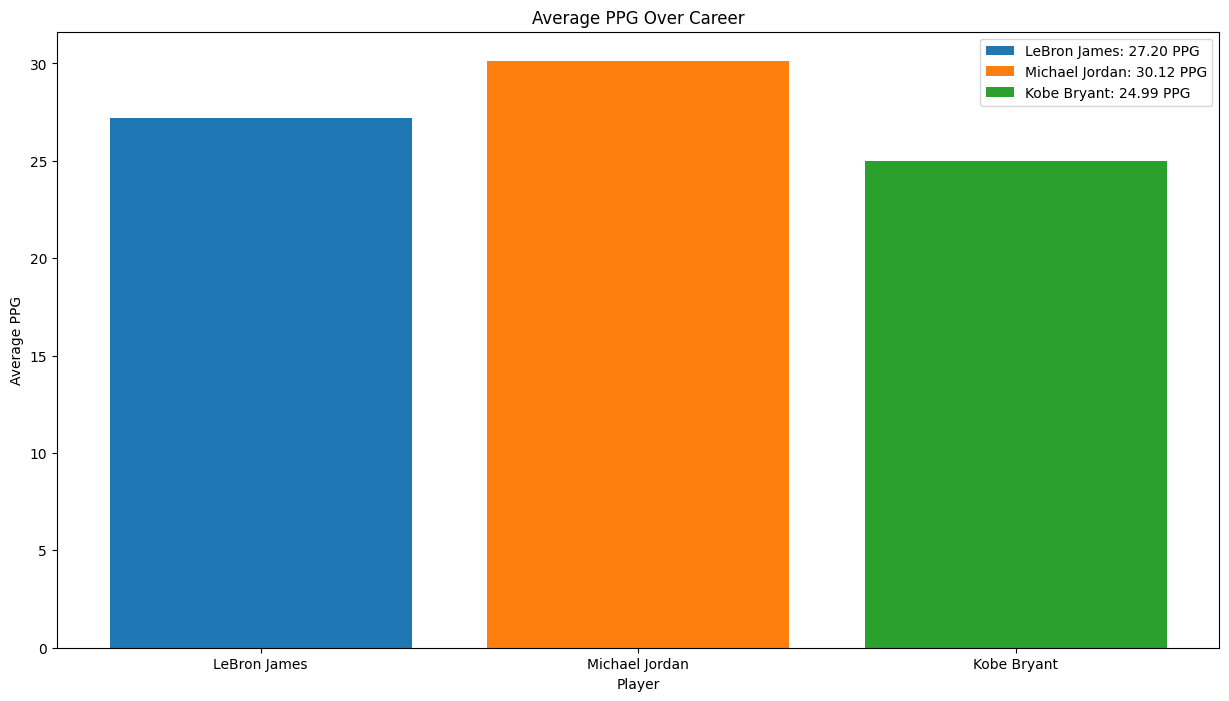

In [97]:
import pandas as pd
from nba_api.stats.static import players
from nba_api.stats.endpoints import PlayerCareerStats
import matplotlib.pyplot as plt

# Function to get player career data
def get_player_career_data(player_name):
    player_dict = players.get_players()
    player = [player for player in player_dict if player['full_name'] == player_name][0]
    player_id = player['id']

    career = PlayerCareerStats(player_id=player_id)
    career_dict = career.get_dict()

    # MultiIndex column creation
    header_1 = ['General Info'] * 5
    header_2 = career_dict['resultSets'][0]['headers']

    col = pd.MultiIndex.from_arrays([header_1 + ['Stats'] * (len(header_2) - 5), header_2])
    
    career_data = pd.DataFrame(career_dict['resultSets'][0]['rowSet'], columns=col)
    return career_data

# Players we're interested in
player_names = ["LeBron James", "Michael Jordan", "Kobe Bryant"]

# Fetch their career data
all_data = {}
for player_name in player_names:
    all_data[player_name] = get_player_career_data(player_name)

# Function to calculate average PPG for each season
def calculate_total_points_for_season(player_data):
    return player_data['Stats']['PTS'].mean()

def calculate_avg_ppg(player_data):
    total_points = player_data['Stats']['PTS'].sum()
    total_games = player_data['Stats']['GP'].sum()
    if total_games == 0:
        return 0
    return total_points / total_games


# Calculate average PPG
avg_ppg_data = {}
for player_name, data in all_data.items():
    avg_ppg_data[player_name] = calculate_avg_ppg(data)

# Plotting
plt.figure(figsize=(15, 8))
seasons = range(1, len(player_names) + 1)

for player_name, avg_ppg in avg_ppg_data.items():
    plt.bar(player_name, avg_ppg, label=f"{player_name}: {avg_ppg:.2f} PPG")

plt.title("Average PPG Over Career")
plt.xlabel("Player")
plt.ylabel("Average PPG")
plt.legend()
plt.show()



In [94]:
# for name in player_names:
#     player_data[name] = get_player_career_data(name)
#     print(player_data[name].columns)  # To check the column names


In [120]:
print(player_data.columns)


MultiIndex([('General Info',         'PLAYER_ID'),
            ('General Info',         'SEASON_ID'),
            ('General Info',         'LEAGUE_ID'),
            ('General Info',           'TEAM_ID'),
            ('General Info', 'TEAM_ABBREVIATION'),
            (       'Stats',        'PLAYER_AGE'),
            (       'Stats',                'GP'),
            (       'Stats',                'GS'),
            (       'Stats',               'MIN'),
            (       'Stats',               'FGM'),
            (       'Stats',               'FGA'),
            (       'Stats',            'FG_PCT'),
            (       'Stats',              'FG3M'),
            (       'Stats',              'FG3A'),
            (       'Stats',           'FG3_PCT'),
            (       'Stats',               'FTM'),
            (       'Stats',               'FTA'),
            (       'Stats',            'FT_PCT'),
            (       'Stats',              'OREB'),
            (       'Stats',   

In [121]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def calculate_avg_ppg_for_season(player_data):
    total_points = player_data['PTS'].sum()
    # total_games = len(player_data)
    total_games = player_data['Stats']['GP'].sum()
    if total_games == 0:
        return 0
    return total_points / total_games

# Initialize a list to store the calculated PPG values
ppg_data_list = []

for name in unique_players:
    player_data = merged_df[merged_df['PLAYER_NAME'] == name]
    for season in unique_seasons:
        season_data = player_data[player_data['SEASON_ID'] == season]
        avg_ppg = calculate_avg_ppg_for_season(season_data)
        ppg_data_list.append({'PLAYER_NAME': name, 'SEASON_ID': season, 'PPG': avg_ppg})

# Convert list of dictionaries to DataFrame
ppg_df = pd.DataFrame(ppg_data_list)

# Rest of your code


# Find the earliest season for each player
earliest_season = avg_ppg_by_season.groupby('PLAYER_NAME')['SEASON_ID'].min().reset_index()

# Sort player names based on their earliest season
sorted_players = earliest_season.sort_values('SEASON_ID')['PLAYER_NAME']

# Plotting
plt.figure(figsize=[20, 10])

for name in sorted_players:
    player_data = ppg_df[ppg_df['PLAYER_NAME'] == name]
    plt.plot(player_data['SEASON_ID'], player_data['PPG'], label=name)

plt.legend()
plt.title('Average PPG by Season')
plt.xlabel('Season')
plt.ylabel('Average PPG')
plt.xticks(rotation=45)
plt.show()


KeyError: 'Stats'

        PLAYER_NAME SEASON_ID     PTS
0       Kobe Bryant   1996-97   539.0
1       Kobe Bryant   1997-98  1220.0
2       Kobe Bryant   1998-99   996.0
3       Kobe Bryant   1999-00  1485.0
4       Kobe Bryant   2000-01  1938.0
5       Kobe Bryant   2001-02  2019.0
6       Kobe Bryant   2002-03  2461.0
7       Kobe Bryant   2003-04  1557.0
8       Kobe Bryant   2004-05  1819.0
9       Kobe Bryant   2005-06  2832.0
10      Kobe Bryant   2006-07  2430.0
11      Kobe Bryant   2007-08  2323.0
12      Kobe Bryant   2008-09  2201.0
13      Kobe Bryant   2009-10  1970.0
14      Kobe Bryant   2010-11  2078.0
15      Kobe Bryant   2011-12  1616.0
16      Kobe Bryant   2012-13  2133.0
17      Kobe Bryant   2013-14    83.0
18      Kobe Bryant   2014-15   782.0
19      Kobe Bryant   2015-16  1161.0
20      Kobe Bryant   2016-17     0.0
21      Kobe Bryant   2017-18     0.0
22      Kobe Bryant   2018-19     0.0
23      Kobe Bryant   2019-20     0.0
24      Kobe Bryant   2020-21     0.0
25      Kobe

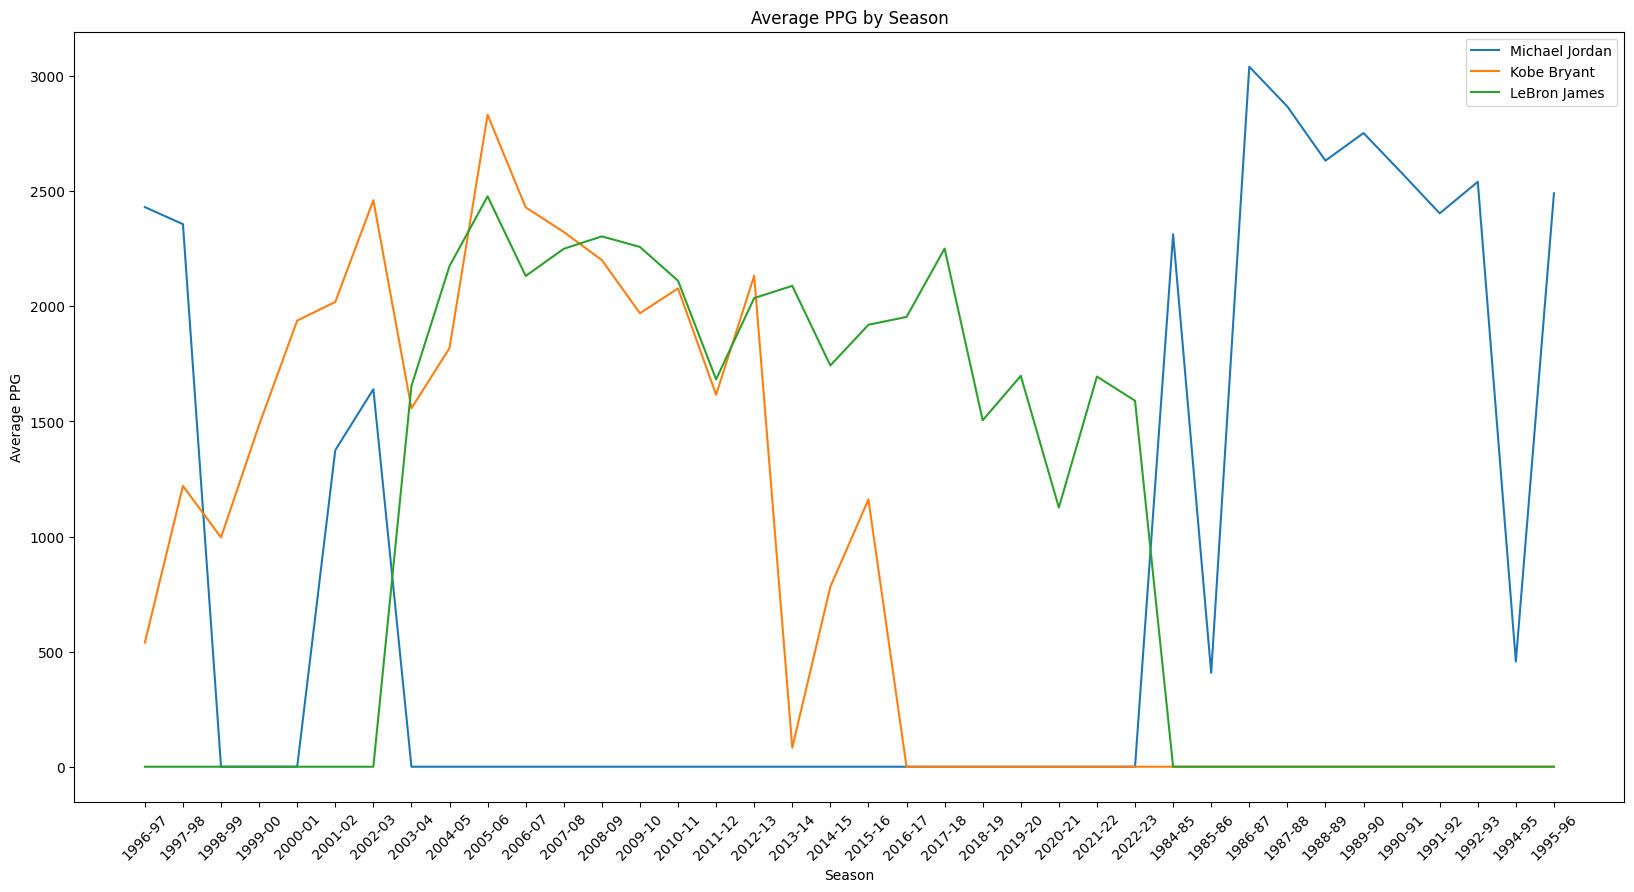

In [115]:

# this is the one you want. It finally fixes the issues where the plots were connecting weirdly (because years were being skipped)
# the issue (with the other previous graphs) was that for players who took a break, it didnt plot the break years which led to some
# issues with the x-axis not being in correct chronological order.
# I fixed this by filling in the gaps with zero points for those seasons where a player did not play.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrame: Replace this with your actual DataFrame
# avg_ppg_by_season = pd.DataFrame(your_data_here)

# Sort by PLAYER_NAME and then by SEASON_ID
avg_ppg_by_season = avg_ppg_by_season.sort_values(['PLAYER_NAME', 'SEASON_ID'])

# Find the unique seasons and players
unique_seasons = avg_ppg_by_season['SEASON_ID'].unique()
unique_players = avg_ppg_by_season['PLAYER_NAME'].unique()

# Create a DataFrame with all combinations of players and seasons
all_combinations = pd.DataFrame([(player, season) for player in unique_players for season in unique_seasons], columns=['PLAYER_NAME', 'SEASON_ID'])

# Merge it with the original DataFrame
merged_df = pd.merge(all_combinations, avg_ppg_by_season, how='left', on=['PLAYER_NAME', 'SEASON_ID'])

# Fill missing points with 0
merged_df['PTS'].fillna(0, inplace=True)


# Find the earliest season for each player
earliest_season = avg_ppg_by_season.groupby('PLAYER_NAME')['SEASON_ID'].min().reset_index()

# Sort player names based on their earliest season
sorted_players = earliest_season.sort_values('SEASON_ID')['PLAYER_NAME']

# Plotting
plt.figure(figsize=[20, 10])

for name in sorted_players:
    player_data = merged_df[merged_df['PLAYER_NAME'] == name]
    avg_ppg_data[name] = calculate_avg_ppg(data)
    plt.plot(player_data['SEASON_ID'], player_data['PTS'], label=name)

# for player_name, data in all_data.items():
#     avg_ppg_data[player_name] = calculate_avg_ppg(data)

plt.legend()
plt.title('Average PPG by Season')
plt.xlabel('Season')
plt.ylabel('Average PPG')

# Optionally rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# # Display the DataFrame with missing points filled in
# pd.set_option('display.max_rows', None)

print(merged_df)

plt.show()


In [119]:
# new attempt:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrame: Replace this with your actual DataFrame
# avg_ppg_by_season = pd.DataFrame(your_data_here)
# Function to get player career data
def get_player_career_data(player_name):
    player_dict = players.get_players()
    player = [player for player in player_dict if player['full_name'] == player_name][0]
    player_id = player['id']

    career = PlayerCareerStats(player_id=player_id)
    career_dict = career.get_dict()

    # MultiIndex column creation
    header_1 = ['General Info'] * 5
    header_2 = career_dict['resultSets'][0]['headers']

    col = pd.MultiIndex.from_arrays([header_1 + ['Stats'] * (len(header_2) - 5), header_2])
    
    career_data = pd.DataFrame(career_dict['resultSets'][0]['rowSet'], columns=col)
    return career_data

# Players we're interested in
player_names = ["LeBron James", "Michael Jordan", "Kobe Bryant"]

# Initialize an empty DataFrame to hold all data
all_data = pd.DataFrame()

# Fetch career data for each player and concatenate into one DataFrame
for player_name in player_names:
    player_data = get_player_career_data(player_name)
    all_data = pd.concat([all_data, player_data], ignore_index=True)

# Now, 'all_data' contains career stats for all players you're interested in
avg_ppg_by_season = all_data  # Make whatever transformations are needed to get it into the format you want
###########

# Sort by PLAYER_NAME and then by SEASON_ID
avg_ppg_by_season = avg_ppg_by_season.sort_values(['PLAYER_NAME', 'SEASON_ID'])

# Find the unique seasons and players
unique_seasons = avg_ppg_by_season['SEASON_ID'].unique()
unique_players = avg_ppg_by_season['PLAYER_NAME'].unique()

# Create a DataFrame with all combinations of players and seasons
all_combinations = pd.DataFrame([(player, season) for player in unique_players for season in unique_seasons], columns=['PLAYER_NAME', 'SEASON_ID'])

# Merge it with the original DataFrame
merged_df = pd.merge(all_combinations, avg_ppg_by_season, how='left', on=['PLAYER_NAME', 'SEASON_ID'])

# Fill missing points with 0 and games with 1
merged_df['PTS'].fillna(0, inplace=True)
merged_df['GP'].fillna(1, inplace=True)  # Assuming 'GAMES' is the column with the number of games

# Calculate PPG
merged_df['PPG'] = merged_df['PTS'] / merged_df['GP']

# Find the earliest season for each player
earliest_season = avg_ppg_by_season.groupby('PLAYER_NAME')['SEASON_ID'].min().reset_index()

# Sort player names based on their earliest season
sorted_players = earliest_season.sort_values('SEASON_ID')['PLAYER_NAME']

# Plotting
plt.figure(figsize=[20, 10])

for name in sorted_players:
    player_data = merged_df[merged_df['PLAYER_NAME'] == name]
    plt.plot(player_data['SEASON_ID'], player_data['PPG'], label=name)  # Plot PPG instead of PTS

plt.legend()
plt.title('Average PPG by Season')
plt.xlabel('Season')
plt.ylabel('Average PPG')

# Optionally rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the DataFrame with missing points filled in (Optional)
# pd.set_option('display.max_rows', None)
# print(merged_df)

plt.show()


KeyError: 'PLAYER_NAME'

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrame: Replace this with your actual DataFrame
# avg_ppg_by_season = pd.DataFrame(your_data_here)

# Calculate PPG
avg_ppg_by_season['PPG'] = avg_ppg_by_season['PTS'] / avg_ppg_by_season['GP']

# Sort by PLAYER_NAME and then by SEASON_ID
avg_ppg_by_season = avg_ppg_by_season.sort_values(['PLAYER_NAME', 'SEASON_ID'])

# Find the unique seasons and players
unique_seasons = avg_ppg_by_season['SEASON_ID'].unique()
unique_players = avg_ppg_by_season['PLAYER_NAME'].unique()

# Create a DataFrame with all combinations of players and seasons
all_combinations = pd.DataFrame([(player, season) for player in unique_players for season in unique_seasons], columns=['PLAYER_NAME', 'SEASON_ID'])

# Merge it with the original DataFrame
merged_df = pd.merge(all_combinations, avg_ppg_by_season, how='left', on=['PLAYER_NAME', 'SEASON_ID'])

# Fill missing PPG with 0
merged_df['PPG'].fillna(0, inplace=True)

# Find the earliest season for each player
earliest_season = avg_ppg_by_season.groupby('PLAYER_NAME')['SEASON_ID'].min().reset_index()

# Sort player names based on their earliest season
sorted_players = earliest_season.sort_values('SEASON_ID')['PLAYER_NAME']

# Plotting
plt.figure(figsize=[20, 10])

for name in sorted_players:
    player_data = merged_df[merged_df['PLAYER_NAME'] == name]
    plt.plot(player_data['SEASON_ID'], player_data['PPG'], label=name)

plt.legend()
plt.title('Average PPG by Season')
plt.xlabel('Season')
plt.ylabel('Average PPG')

# Optionally rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()


KeyError: 'GP'

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrame: Replace this with your actual DataFrame
# avg_ppg_by_season = pd.DataFrame(your_data_here)

# Sort by PLAYER_NAME and then by SEASON_ID
avg_ppg_by_season.sort_values(['PLAYER_NAME', 'SEASON_ID'], inplace=True)

# Find the unique seasons and players
unique_seasons = avg_ppg_by_season['SEASON_ID'].unique()
unique_players = avg_ppg_by_season['PLAYER_NAME'].unique()

# Create a DataFrame with all combinations of players and seasons
all_combinations = pd.DataFrame([(player, season) for player in unique_players for season in unique_seasons], columns=['PLAYER_NAME', 'SEASON_ID'])

# Merge it with the original DataFrame
merged_df = pd.merge(all_combinations, avg_ppg_by_season, how='left', on=['PLAYER_NAME', 'SEASON_ID'])

# Fill missing points and games played with 0
merged_df['PTS'].fillna(0, inplace=True)
merged_df['GP'].fillna(0, inplace=True)

# Calculate PPG, safely handling divide-by-zero by setting those to zero
merged_df['PPG'] = np.where(merged_df['GP'] == 0, 0, merged_df['PTS'] / merged_df['GP'])

# Find the earliest season for each player
earliest_season = avg_ppg_by_season.groupby('PLAYER_NAME')['SEASON_ID'].min().reset_index()

# Sort player names based on their earliest season
sorted_players = earliest_season.sort_values('SEASON_ID')['PLAYER_NAME']

# Plotting
plt.figure(figsize=[20, 10])
for name in sorted_players:
    player_data = merged_df[merged_df['PLAYER_NAME'] == name]
    plt.plot(player_data['SEASON_ID'], player_data['PPG'], label=name)

plt.legend()
plt.title('Average PPG by Season')
plt.xlabel('Season')
plt.ylabel('Average PPG')

# Optionally rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()


KeyError: 'GP'

In [83]:
print(avg_ppg_by_season.columns)


Index(['SEASON_ID', 'PLAYER_NAME', 'PTS'], dtype='object')


In [86]:
print(all_data['LeBron James'].columns)


MultiIndex([('General Info',         'PLAYER_ID'),
            ('General Info',         'SEASON_ID'),
            ('General Info',         'LEAGUE_ID'),
            ('General Info',           'TEAM_ID'),
            ('General Info', 'TEAM_ABBREVIATION'),
            (       'Stats',        'PLAYER_AGE'),
            (       'Stats',                'GP'),
            (       'Stats',                'GS'),
            (       'Stats',               'MIN'),
            (       'Stats',               'FGM'),
            (       'Stats',               'FGA'),
            (       'Stats',            'FG_PCT'),
            (       'Stats',              'FG3M'),
            (       'Stats',              'FG3A'),
            (       'Stats',           'FG3_PCT'),
            (       'Stats',               'FTM'),
            (       'Stats',               'FTA'),
            (       'Stats',            'FT_PCT'),
            (       'Stats',              'OREB'),
            (       'Stats',   

In [87]:
print(all_data['LeBron James']['Stats']['GP'])


0     79
1     80
2     79
3     78
4     75
5     81
6     76
7     79
8     62
9     76
10    77
11    69
12    76
13    74
14    82
15    55
16    67
17    45
18    56
19    55
Name: GP, dtype: int64
